In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from feature_builder import process_dataset
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = pd.read_csv('train.csv')
y_train=x_train[['id','target']]

In [3]:
x_train_features = process_dataset(x_train, text_type=None)
x_train_feat, x_test_feat, y_train_feat, y_test_feat = train_test_split(x_train_features, y_train, test_size = .33, random_state = 17)

In [4]:
rforest = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=4)

rforest.fit(x_train_feat, y_train_feat['target'])

predictions=rforest.predict(x_test_feat)

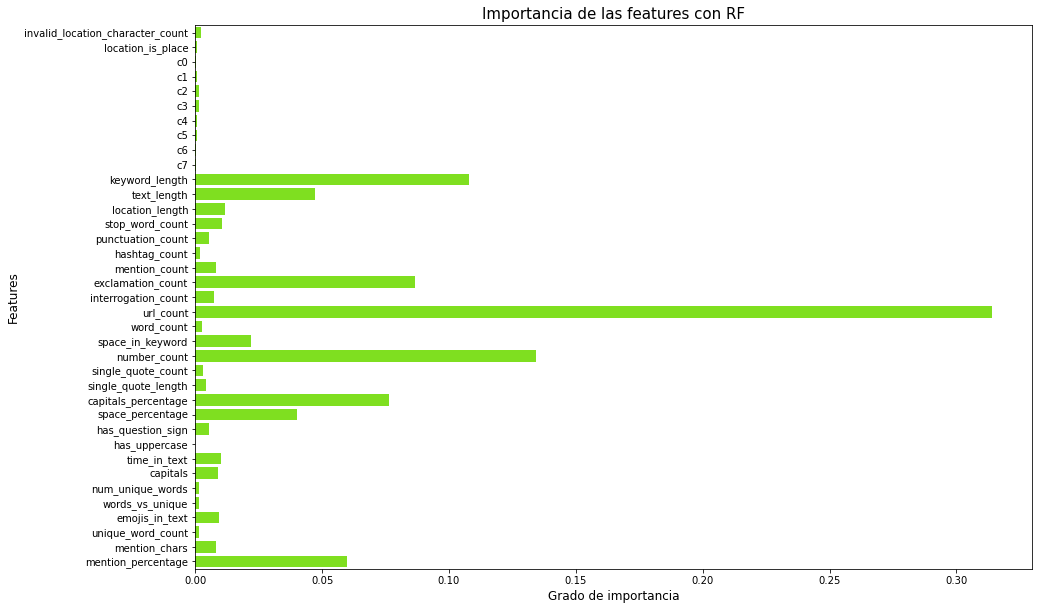

In [5]:
#En clase recomendaron usar RF para feature importance
#En base a estas metricas se puede determinar la importancia de las features para saber su efecto
g = sns.barplot(rforest.feature_importances_, x_train_feat.columns, orient='h', color='chartreuse')
g.set_title("Importancia de las features con RF", fontsize=15)
g.set_xlabel("Grado de importancia", fontsize=12)
g.set_ylabel("Features", fontsize=12)
fig = plt.gcf()
fig.set_size_inches(15, 10)

Correlaciones lineales entre features

In [6]:
limit = 0.95
corr_matrix=x_train_feat.corr().abs()
corr_matrix.head()

,invalid_location_character_count,location_is_place,c0,c1,c2,c3,c4,c5,c6,c7,...,has_question_sign,has_uppercase,time_in_text,capitals,num_unique_words,words_vs_unique,emojis_in_text,unique_word_count,mention_chars,mention_percentage
invalid_location_character_count,1.000000,0.042767,0.013422,0.004780,0.011950,0.028692,0.013346,0.012458,0.013089,0.003577,...,0.013381,0.002797,0.007415,0.004371,0.005148,0.018807,0.007415,0.005148,0.008510,0.001199
location_is_place,0.042767,1.000000,0.012849,0.019009,0.000633,0.015267,0.039622,0.001875,0.013639,0.022083,...,0.002697,0.032267,0.024909,0.002225,0.032392,0.005907,0.024909,0.032392,0.022017,0.009892
c0,0.013422,0.012849,1.000000,0.008870,0.017258,0.015597,0.022560,0.008492,0.011213,0.002049,...,0.034636,0.012348,0.059893,0.020719,0.001562,0.027902,0.059893,0.001562,0.017444,0.018261
c1,0.004780,0.019009,0.008870,1.000000,0.004323,0.013481,0.002114,0.026141,0.002133,0.002535,...,0.013835,0.007093,0.031705,0.011477,0.029011,0.016833,0.031705,0.029011,0.020228,0.016763
c2,0.011950,0.000633,0.017258,0.004323,1.000000,0.002358,0.017664,0.012716,0.003622,0.021408,...,0.036624,0.011733,0.030742,0.009681,0.001675,0.025993,0.030742,0.001675,0.008131,0.005579


<AxesSubplot:>

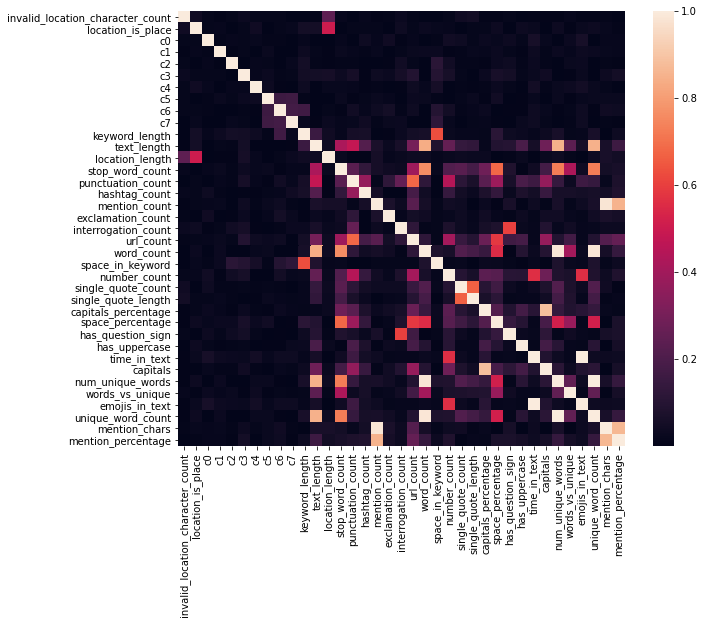

In [15]:
fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
sns.heatmap(corr_matrix, ax=ax)

In [8]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,invalid_location_character_count,location_is_place,c0,c1,c2,c3,c4,c5,c6,c7,...,mention_chars,mention_percentage,has_question_sign,has_uppercase,time_in_text,emojis_in_text,word_density,capitals,num_unique_words,words_vs_unique
invalid_location_character_count,NaN,0.042767,0.008567,0.001305,0.029519,0.004483,0.023767,0.010762,0.013634,0.025575,...,0.008510,0.001199,0.013381,0.002797,0.007415,0.007415,0.005460,0.004371,0.005148,0.018807
location_is_place,NaN,NaN,0.006189,0.015066,0.019039,0.030467,0.002723,0.000042,0.014267,0.004547,...,0.022017,0.009892,0.002697,0.032267,0.024909,0.024909,0.039703,0.002225,0.032392,0.005907
c0,NaN,NaN,NaN,0.002751,0.015683,0.017224,0.001149,0.011665,0.004911,0.025948,...,0.006624,0.015200,0.009743,0.017716,0.024867,0.024867,0.019391,0.010386,0.005183,0.000038
c1,NaN,NaN,NaN,NaN,0.001185,0.000473,0.004769,0.001241,0.005338,0.003819,...,0.020458,0.023787,0.015083,0.004622,0.040037,0.040037,0.005670,0.011641,0.055264,0.011964
c2,NaN,NaN,NaN,NaN,NaN,0.017313,0.016907,0.010374,0.003195,0.014650,...,0.009407,0.018855,0.015753,0.009087,0.021487,0.021487,0.003076,0.003208,0.044346,0.017967


In [9]:
linear_combs = [column for column in upper.columns if any(upper[column] > limit)]

In [10]:
print(linear_combs)

['unique_word_count', 'mention_chars', 'emojis_in_text', 'num_unique_words']
